In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil

,date,song,artist,song_id
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o


In [3]:
bil_60 = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly_1960.pkl')
bil_60

,date,song,artist,song_id
0,1972-12-30,Me And Mrs. Jones,Billy Paul,6Ro2z4RtAUew9Kz2HZWZUi
1,1972-12-30,Clair,Gilbert O'Sullivan,1lYJDRaadnotdfcZFp5Izd
2,1972-12-30,You Ought To Be With Me,Al Green,0abCAdQ235vfucv4zXeSbG
3,1972-12-30,You're So Vain,Carly Simon,2DnJjbjNTV9Nd5NOa1KGba
4,1972-12-30,It Never Rains In Southern California,Albert Hammond,6tunhVGD8C05MZNjSVIsjw
...,...,...,...,...
67795,1960-01-04,Deck Of Cards,Wink Martindale,4U3S2BgQeX25uW0fEPDSSt
67796,1960-01-04,One Mint Julep,Chet Atkins,5yNabTPoV1Cd8CIKTpbpKT
67797,1960-01-04,Happy Anniversary,Jane Morgan,2oiLl1u7qg6LZZA595Ok4d
67798,1960-01-04,Smokie-Part 2,Bill Doggett,1i6yUtUVpCfvywb8idBciK


In [39]:
bil = bil.append(bil_60, ignore_index=True)
bil = bil[bil['date'] >= '1975-01-01']
bil

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/3321391793.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bil = bil.append(bil_60, ignore_index=True)


,date,song,artist,song_id,uri
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...,...
244482,1975-01-04,Let Me Start Tonite,Lamont Dozier,2gO8oB0iRASgHstU5S6SLF,spotify:track:2gO8oB0iRASgHstU5S6SLF
244483,1975-01-04,Ms. Grace,The Tymes,1LPCESFhMbgMaQjRG5dm9P,spotify:track:1LPCESFhMbgMaQjRG5dm9P
244484,1975-01-04,Lady Marmalade,Labelle,17VWTx7LD7liGlpnlGhUbn,spotify:track:17VWTx7LD7liGlpnlGhUbn
244485,1975-01-04,Up In A Puff Of Smoke,Polly Brown,3PeiH20utGblIO1Bv82tmo,spotify:track:3PeiH20utGblIO1Bv82tmo


In [6]:
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
1,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
2,0.0383,0.591,141806,0.764,0.000000,1,0.1030,-5.484,1,0.0483,169.928,4,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.478
3,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
4,0.0383,0.591,141806,0.764,0.000000,1,0.1030,-5.484,1,0.0483,169.928,4,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003450,0.2630,0.598,194240,0.560,0.000095,10,0.4300,-10.529,1,0.0290,110.402,4,spotify:track:6WdhPUH1mvuvtmDjLSSAZn,0.676
1003451,0.2150,0.512,153173,0.977,0.000000,2,0.3430,-4.505,1,0.0671,120.165,4,spotify:track:6LqbJXriVJyqJCd9jYoPqP,0.731
1003452,0.1630,0.535,183360,0.366,0.000000,9,0.0791,-16.004,1,0.0496,88.732,4,spotify:track:3BmQL02PItbRsBL6j7VJc3,0.590
1003453,0.1400,0.693,317213,0.370,0.000199,7,0.4600,-13.270,1,0.0295,102.827,4,spotify:track:0WTCCeS8DRcFGOu43p0A2C,0.312


In [7]:
audio_60 = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features_1960.pkl')
audio_60

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.234,0.294,284907,0.528,0.000000,8,0.1470,-10.010,1,0.0471,200.813,3,spotify:track:6Ro2z4RtAUew9Kz2HZWZUi,0.452
1,0.234,0.294,284907,0.528,0.000000,8,0.1470,-10.010,1,0.0471,200.813,3,spotify:track:6Ro2z4RtAUew9Kz2HZWZUi,0.452
2,0.509,0.720,182627,0.500,0.000000,9,0.1470,-7.306,1,0.0347,105.727,4,spotify:track:1lYJDRaadnotdfcZFp5Izd,0.609
3,0.234,0.294,284907,0.528,0.000000,8,0.1470,-10.010,1,0.0471,200.813,3,spotify:track:6Ro2z4RtAUew9Kz2HZWZUi,0.452
4,0.509,0.720,182627,0.500,0.000000,9,0.1470,-7.306,1,0.0347,105.727,4,spotify:track:1lYJDRaadnotdfcZFp5Izd,0.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423516,0.967,0.686,152267,0.497,0.000416,0,0.1050,-10.422,0,0.0579,118.871,4,spotify:track:7FIcV2kEiO2mvvMbxU5Jkn,0.559
423517,0.805,0.586,122667,0.657,0.000056,10,0.1420,-11.173,1,0.0389,115.215,4,spotify:track:3QqafgZ1FJVKOA0Nl0yKxm,0.784
423518,0.871,0.490,240880,0.376,0.000004,0,0.1210,-16.060,1,0.6180,170.841,3,spotify:track:4U3S2BgQeX25uW0fEPDSSt,0.672
423519,0.950,0.251,148120,0.188,0.000618,0,0.0941,-13.823,1,0.0315,95.542,4,spotify:track:2oiLl1u7qg6LZZA595Ok4d,0.321


In [8]:
audio = audio.append(audio_60, ignore_index=True)
audio = audio.drop_duplicates()
audio

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/2201621260.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio = audio.append(audio_60, ignore_index=True)


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
2,0.0383,0.591,141806,0.764,0.000000,1,0.1030,-5.484,1,0.0483,169.928,4,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.478
5,0.0203,0.736,212000,0.704,0.000000,3,0.0501,-7.409,0,0.0615,149.995,4,spotify:track:27NovPIUIRrOZoCHxABJwK,0.894
9,0.1110,0.647,161853,0.765,0.000000,1,0.3150,-6.459,1,0.0600,79.994,4,spotify:track:58UKC45GPNTflCN6nwCUeF,0.855
14,0.0451,0.807,230747,0.893,0.000028,11,0.3660,-3.745,0,0.0347,126.011,4,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426609,0.9670,0.686,152267,0.497,0.000416,0,0.1050,-10.422,0,0.0579,118.871,4,spotify:track:7FIcV2kEiO2mvvMbxU5Jkn,0.559
1426699,0.8050,0.586,122667,0.657,0.000056,10,0.1420,-11.173,1,0.0389,115.215,4,spotify:track:3QqafgZ1FJVKOA0Nl0yKxm,0.784
1426790,0.8710,0.490,240880,0.376,0.000004,0,0.1210,-16.060,1,0.6180,170.841,3,spotify:track:4U3S2BgQeX25uW0fEPDSSt,0.672
1426882,0.9500,0.251,148120,0.188,0.000618,0,0.0941,-13.823,1,0.0315,95.542,4,spotify:track:2oiLl1u7qg6LZZA595Ok4d,0.321


In [9]:
audio.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,28036.000000,28036.000000,2.803600e+04,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000,28036.000000
mean,0.298682,0.601859,2.202361e+05,0.612504,0.047724,5.217078,0.192715,-8.793472,0.717577,0.076770,120.283185,3.930411,0.594115
std,0.287206,0.155929,6.746571e+04,0.203756,0.174087,3.570567,0.161306,3.902291,0.450186,0.087516,28.313881,0.330983,0.241853
min,0.000001,0.000000,2.968800e+04,0.000530,0.000000,0.000000,0.014600,-42.391000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045700,0.499000,1.742512e+05,0.471000,0.000000,2.000000,0.091600,-11.091000,0.000000,0.032500,98.930500,4.000000,0.402000
50%,0.198000,0.610000,2.138930e+05,0.629000,0.000005,5.000000,0.130000,-8.237000,1.000000,0.042100,119.012000,4.000000,0.613000
75%,0.517000,0.713000,2.531900e+05,0.774000,0.000694,8.000000,0.247000,-5.902000,1.000000,0.071600,136.788000,4.000000,0.797000
max,0.996000,0.988000,1.561133e+06,1.000000,1.000000,11.000000,0.999000,2.291000,1.000000,0.956000,241.009000,5.000000,0.991000


/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/1716794225.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  audio.hist(ax=ax, bins=35)


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

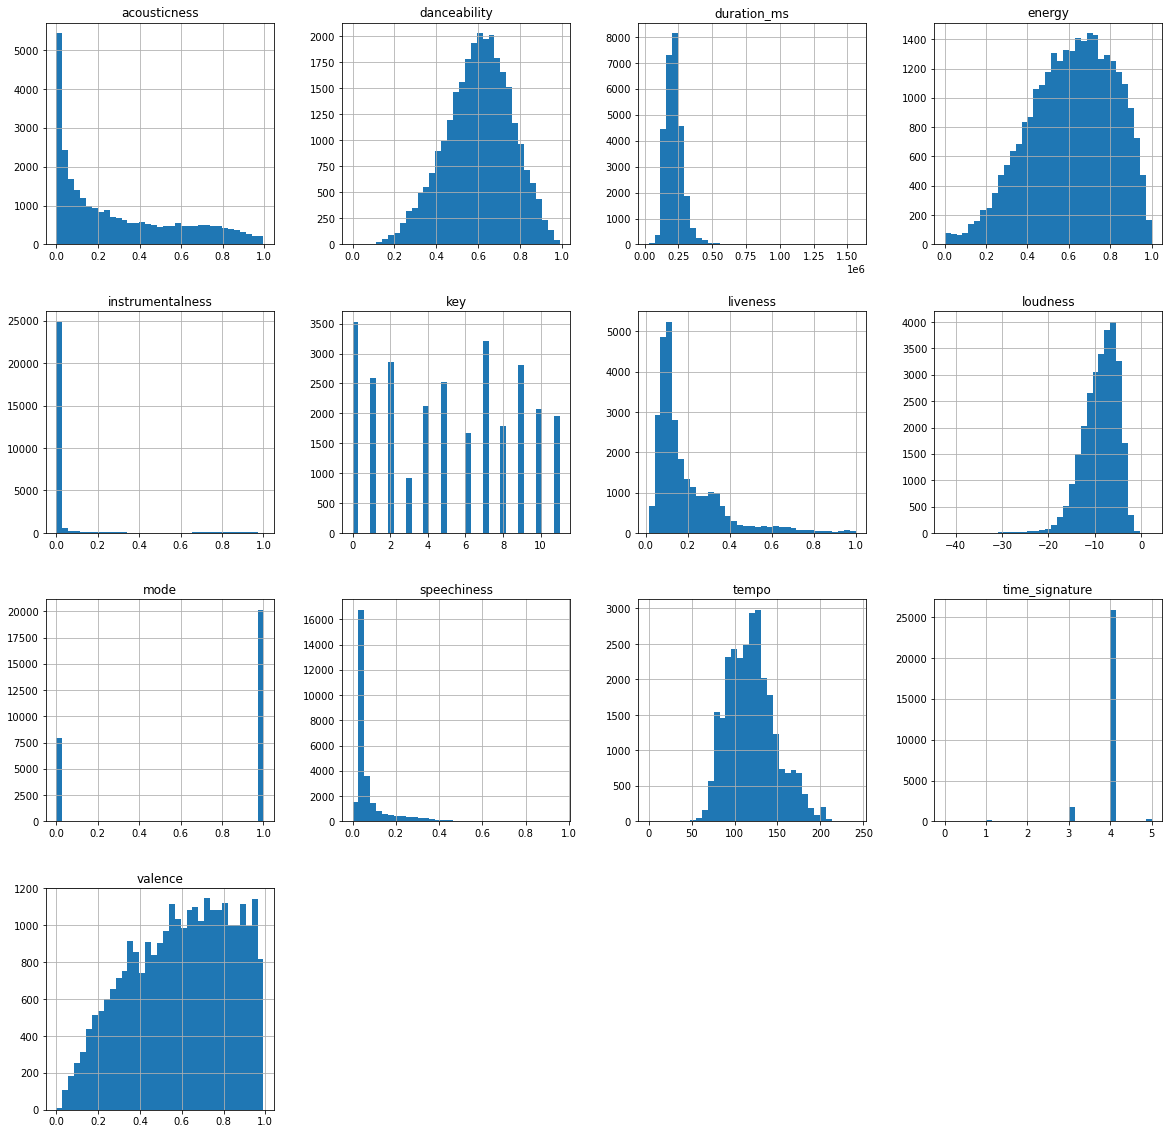

In [10]:
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(20,20))

audio.hist(ax=ax, bins=35)

In [40]:
bil['uri'] = 'spotify:track:' + bil['song_id']
bil

,date,song,artist,song_id,uri
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...,...
244482,1975-01-04,Let Me Start Tonite,Lamont Dozier,2gO8oB0iRASgHstU5S6SLF,spotify:track:2gO8oB0iRASgHstU5S6SLF
244483,1975-01-04,Ms. Grace,The Tymes,1LPCESFhMbgMaQjRG5dm9P,spotify:track:1LPCESFhMbgMaQjRG5dm9P
244484,1975-01-04,Lady Marmalade,Labelle,17VWTx7LD7liGlpnlGhUbn,spotify:track:17VWTx7LD7liGlpnlGhUbn
244485,1975-01-04,Up In A Puff Of Smoke,Polly Brown,3PeiH20utGblIO1Bv82tmo,spotify:track:3PeiH20utGblIO1Bv82tmo


In [41]:
merged = pd.merge(bil, audio, how='left', on='uri')
merged

,date,song,artist,song_id,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.5780,0.604,224695.0,0.366,0.000000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.0383,0.591,141806.0,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,0.0203,0.736,212000.0,0.704,0.000000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF,0.1110,0.647,161853.0,0.765,0.000000,1.0,0.3150,-6.459,1.0,0.0600,79.994,4.0,0.855
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.0451,0.807,230747.0,0.893,0.000028,11.0,0.3660,-3.745,0.0,0.0347,126.011,4.0,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244482,1975-01-04,Let Me Start Tonite,Lamont Dozier,2gO8oB0iRASgHstU5S6SLF,spotify:track:2gO8oB0iRASgHstU5S6SLF,0.0971,0.443,222325.0,0.674,0.329000,11.0,0.0867,-8.534,1.0,0.0401,129.246,4.0,0.763
244483,1975-01-04,Ms. Grace,The Tymes,1LPCESFhMbgMaQjRG5dm9P,spotify:track:1LPCESFhMbgMaQjRG5dm9P,0.4100,0.484,206360.0,0.772,0.000000,2.0,0.1480,-7.668,1.0,0.0782,116.858,4.0,0.667
244484,1975-01-04,Lady Marmalade,Labelle,17VWTx7LD7liGlpnlGhUbn,spotify:track:17VWTx7LD7liGlpnlGhUbn,0.3980,0.631,237120.0,0.563,0.000000,2.0,0.0733,-12.135,0.0,0.0552,117.963,4.0,0.947
244485,1975-01-04,Up In A Puff Of Smoke,Polly Brown,3PeiH20utGblIO1Bv82tmo,spotify:track:3PeiH20utGblIO1Bv82tmo,0.3180,0.547,210040.0,0.542,0.000000,5.0,0.1500,-11.371,1.0,0.0363,134.409,4.0,0.426


In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244487 entries, 0 to 244486
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              244487 non-null  object 
 1   song              244487 non-null  object 
 2   artist            244487 non-null  object 
 3   song_id           244487 non-null  object 
 4   uri               244487 non-null  object 
 5   acousticness      244467 non-null  float64
 6   danceability      244467 non-null  float64
 7   duration_ms       244467 non-null  float64
 8   energy            244467 non-null  float64
 9   instrumentalness  244467 non-null  float64
 10  key               244467 non-null  float64
 11  liveness          244467 non-null  float64
 12  loudness          244467 non-null  float64
 13  mode              244467 non-null  float64
 14  speechiness       244467 non-null  float64
 15  tempo             244467 non-null  float64
 16  time_signature    24

In [43]:
# Drop rows that have null
merged = merged.dropna()

In [44]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/3648480381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['date'] = pd.to_datetime(merged['date'])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/3648480381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['month'] = merged['date'].dt.strftime('%Y-%m')
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_67040/3648480381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [45]:
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df[monthly_df['month'] <= '2021-10-01']
monthly_df

,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1975-01-01,0.358626,0.591538,224563.8050,0.579553,0.064224,5.0625,0.197377,-10.259368,0.8125,0.052111,115.325083,3.9575,0.672567
1,1975-02-01,0.368940,0.588253,220808.0600,0.588122,0.050941,5.4350,0.181158,-10.012720,0.8600,0.050159,115.271552,3.9500,0.665122
2,1975-03-01,0.334843,0.590070,229350.4920,0.581048,0.054995,5.8280,0.184357,-10.316240,0.8400,0.050184,114.686858,3.9220,0.664684
3,1975-04-01,0.338728,0.580120,236438.6350,0.551515,0.069511,6.1125,0.158960,-10.934342,0.7850,0.052581,117.653617,3.9000,0.653632
4,1975-05-01,0.337907,0.571930,234010.9940,0.587851,0.076120,5.7140,0.163500,-10.626060,0.7500,0.057598,121.127004,3.9060,0.668920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
558,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
559,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
560,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


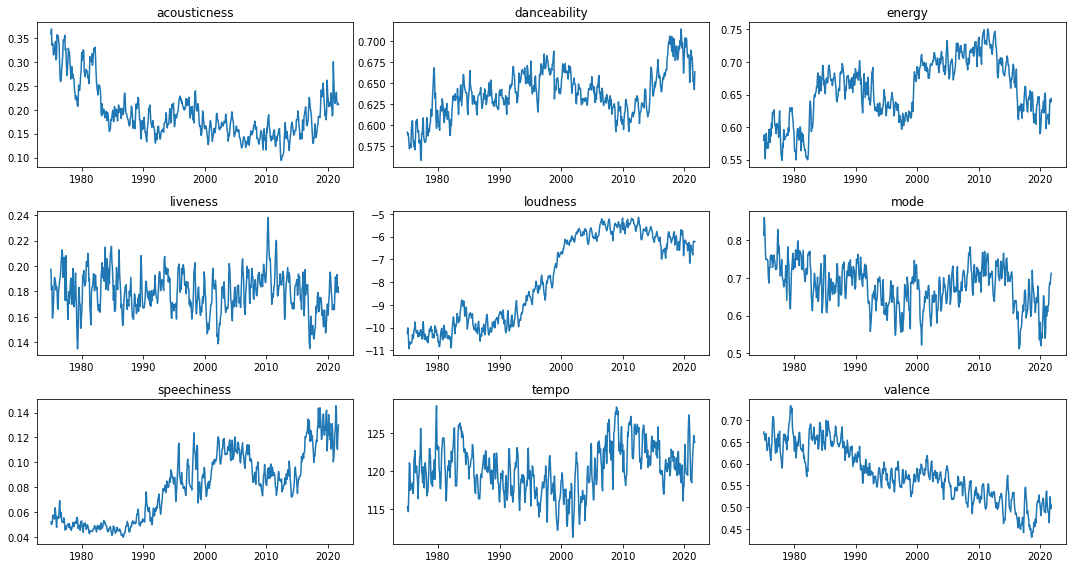

In [46]:
fig = plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4= fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x = monthly_df['month']

y1 = monthly_df['acousticness']
y2 = monthly_df['danceability']
y3 = monthly_df['energy']
y4 = monthly_df['liveness']
y5 = monthly_df['loudness']
y6 = monthly_df['mode']
y7 = monthly_df['speechiness']
y8 = monthly_df['tempo']
y9 = monthly_df['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)


ax1.set_title('acousticness')
ax2.set_title('danceability')
ax3.set_title('energy')
ax4.set_title('liveness')
ax5.set_title('loudness')
ax6.set_title('mode')
ax7.set_title('speechiness')
ax8.set_title('tempo')
ax9.set_title('valence')


fig.tight_layout()
plt.show()

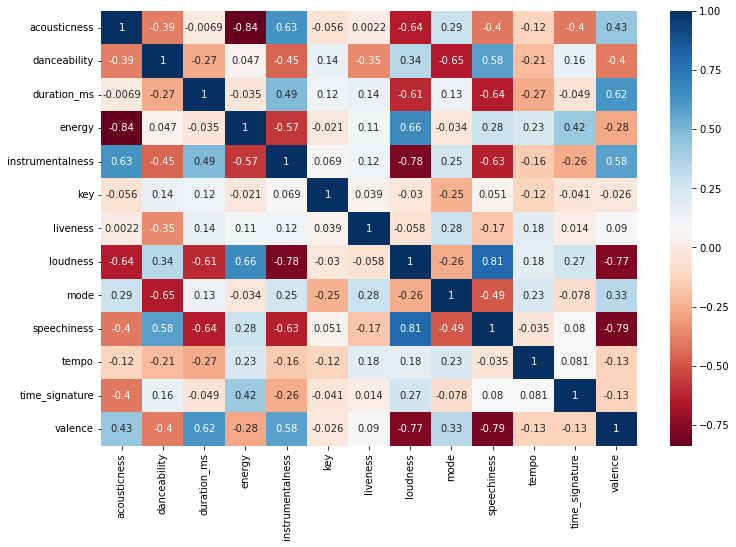

In [47]:
corr = monthly_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

In [48]:
unemp = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/unemployment_rate.csv')
unemp 

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
895,2022-08-01,3.7
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6


In [49]:
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
unemp = unemp[('1975-01-01' <= unemp['DATE']) & (unemp['DATE'] <= '2021-10-01')]
unemp

,DATE,UNRATE
324,1975-01-01,8.1
325,1975-02-01,8.1
326,1975-03-01,8.6
327,1975-04-01,8.8
328,1975-05-01,9.0
...,...,...
881,2021-06-01,5.9
882,2021-07-01,5.4
883,2021-08-01,5.2
884,2021-09-01,4.8


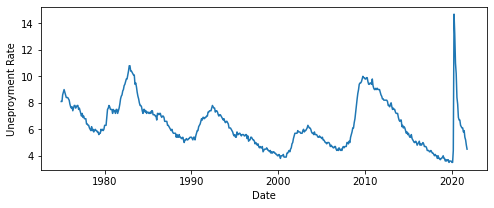

In [50]:
plt.figure(figsize=(8,3))
plt.plot(unemp['DATE'], unemp['UNRATE'])
plt.ylabel('Uneproyment Rate')
plt.xlabel('Date')
plt.show()

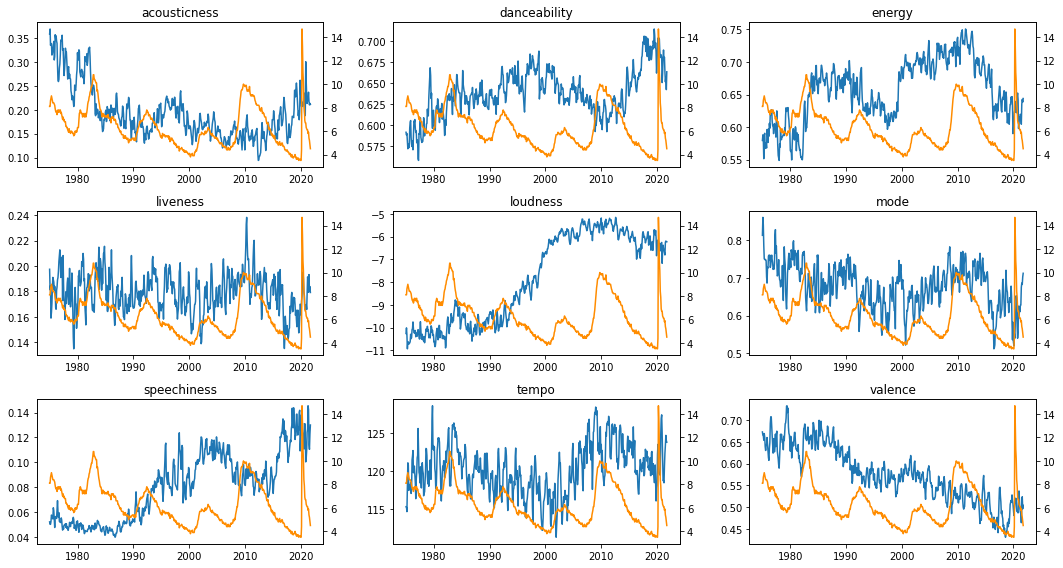

In [51]:
fig = plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x = monthly_df['month']

y1 = monthly_df['acousticness']
y2 = monthly_df['danceability']
y3 = monthly_df['energy']
y4 = monthly_df['liveness']
y5 = monthly_df['loudness']
y6 = monthly_df['mode']
y7 = monthly_df['speechiness']
y8 = monthly_df['tempo']
y9 = monthly_df['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)

ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()

z = unemp['UNRATE']

ax1_1.plot(x, z, color='darkorange')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
ax6_1.plot(x, z, color='darkorange')
ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')

ax1.set_title('acousticness')
ax2.set_title('danceability')
ax3.set_title('energy')
ax4.set_title('liveness')
ax5.set_title('loudness')
ax6.set_title('mode')
ax7.set_title('speechiness')
ax8.set_title('tempo')
ax9.set_title('valence')


fig.tight_layout()
plt.show()

In [52]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['acousticness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     24.18
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.16e-06
Time:                        15:29:45   Log-Likelihood:                 844.36
No. Observations:                 562   AIC:                            -1685.
Df Residuals:                     560   BIC:                            -1676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1525      0.009     17.531      0.0

In [53]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['danceability']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     183.7
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.17e-36
Time:                        15:29:56   Log-Likelihood:                 1294.6
No. Observations:                 562   AIC:                            -2585.
Df Residuals:                     560   BIC:                            -2577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6892      0.004    176.474      0.0

In [54]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['energy']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06595
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.797
Time:                        15:30:01   Log-Likelihood:                 930.62
No. Observations:                 562   AIC:                            -1857.
Df Residuals:                     560   BIC:                            -1849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6587      0.007     88.261      0.0

In [55]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['liveness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     108.9
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.02e-23
Time:                        15:30:29   Log-Likelihood:                 1599.5
No. Observations:                 562   AIC:                            -3195.
Df Residuals:                     560   BIC:                            -3186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1566      0.002     68.987      0.0

In [56]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['loudness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     36.62
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.63e-09
Time:                        15:30:37   Log-Likelihood:                -1149.4
No. Observations:                 562   AIC:                             2303.
Df Residuals:                     560   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0643      0.302    -20.066      0.0

In [57]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['mode']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     69.07
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           7.21e-16
Time:                        15:30:43   Log-Likelihood:                 847.62
No. Observations:                 562   AIC:                            -1691.
Df Residuals:                     560   BIC:                            -1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6089      0.009     70.386      0.0

In [58]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['speechiness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     134.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           5.62e-28
Time:                        15:30:49   Log-Likelihood:                 1289.9
No. Observations:                 562   AIC:                            -2576.
Df Residuals:                     560   BIC:                            -2567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1245      0.004     31.608      0.0

In [59]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['tempo']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     60.42
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.70e-14
Time:                        15:30:57   Log-Likelihood:                -1421.6
No. Observations:                 562   AIC:                             2847.
Df Residuals:                     560   BIC:                             2856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.6383      0.490    237.804      0.0

In [60]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['valence']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     52.51
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.43e-12
Time:                        15:31:04   Log-Likelihood:                 780.36
No. Observations:                 562   AIC:                            -1557.
Df Residuals:                     560   BIC:                            -1548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5078      0.010     52.077      0.0